In [1]:
import pandas as pd

# url to get the IRIS data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" 

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

print(df.head()) #Showing 5 records from the data

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [6]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
# Please note we separated the dependend variable ( Target column in this example) as the function of PCA is not find the 
# number of principle components which is able to explain most of the variance in the data i.e in all the features
# Since, PCA is not concerned about dependent variable, it is called an Unsupervised learning algorithm ( More on unsupervised learning later)
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
print(pd.DataFrame(x).head())

          0         1         2         3
0 -0.900681  1.032057 -1.341272 -1.312977
1 -1.143017 -0.124958 -1.341272 -1.312977
2 -1.385353  0.337848 -1.398138 -1.312977
3 -1.506521  0.106445 -1.284407 -1.312977
4 -1.021849  1.263460 -1.341272 -1.312977


In [9]:
#Importing the PCA class from the scikit-learn's decomposition library
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(principalDf.head())
print()

# Adding the dependent variable back to the dataset
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf.head())

   principal component 1  principal component 2
0              -2.264542               0.505704
1              -2.086426              -0.655405
2              -2.367950              -0.318477
3              -2.304197              -0.575368
4              -2.388777               0.674767

   principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa


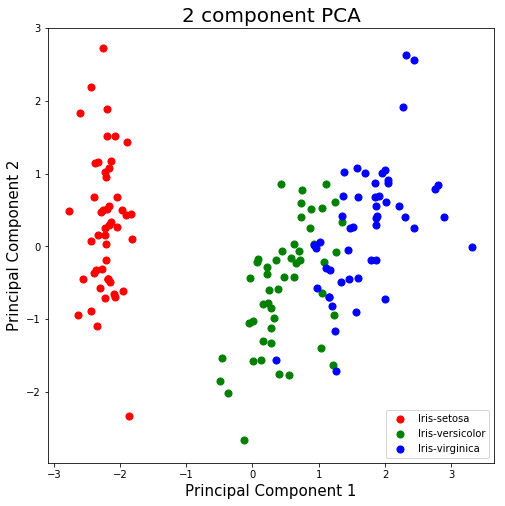

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.show()

In [12]:
import pandas as pd

# url to get the IRIS data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" 

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

print(df.head()) #Showing 5 records from the data

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [13]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values
y = y.ravel()

# Standardizing the features
x = StandardScaler().fit_transform(x)

print(pd.DataFrame(x).head())

          0         1         2         3
0 -0.900681  1.032057 -1.341272 -1.312977
1 -1.143017 -0.124958 -1.341272 -1.312977
2 -1.385353  0.337848 -1.398138 -1.312977
3 -1.506521  0.106445 -1.284407 -1.312977
4 -1.021849  1.263460 -1.341272 -1.312977


In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
linearComponents = lda.fit_transform(x, y)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['linear component 1', 'linear component 2'])
print(principalDf.head())
print()

# Adding the dependent variable back to the dataset
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf.head())

   linear component 1  linear component 2
0           -2.264542            0.505704
1           -2.086426           -0.655405
2           -2.367950           -0.318477
3           -2.304197           -0.575368
4           -2.388777            0.674767

   linear component 1  linear component 2       target
0           -2.264542            0.505704  Iris-setosa
1           -2.086426           -0.655405  Iris-setosa
2           -2.367950           -0.318477  Iris-setosa
3           -2.304197           -0.575368  Iris-setosa
4           -2.388777            0.674767  Iris-setosa


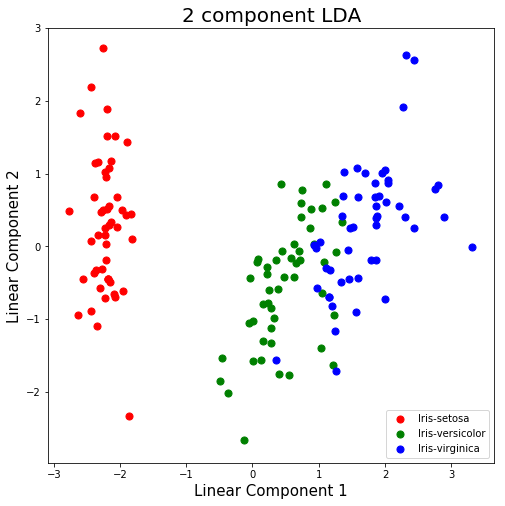

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Linear Component 1', fontsize = 15)
ax.set_ylabel('Linear Component 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'linear component 1']
               , finalDf.loc[indicesToKeep, 'linear component 2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.show()

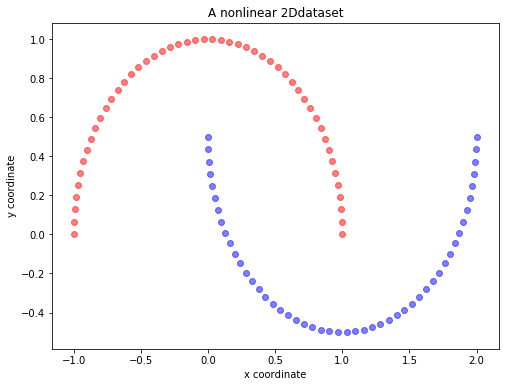

In [20]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

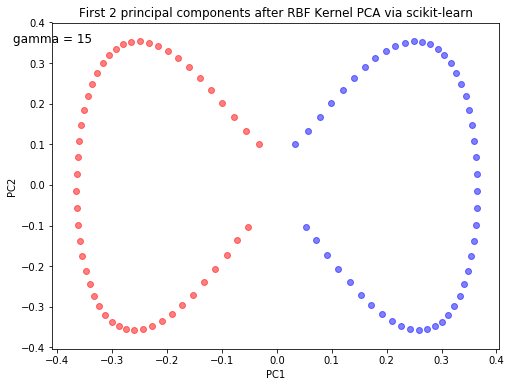

In [21]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', alpha=0.5)

plt.text(-0.48, 0.35, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()